In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Model1 SEIR



In [5]:
def get_update_seir(vals,dt):
    N,S,E,I,R,D = vals
    br = mu*N

    Snew = S + dt * (br - (mu*S) - (beta*S*I/N))
    Enew = E + dt * ((beta*S*I/N) - (mu + epsilon)*E)
    Inew = I + dt * (epsilon*E - (gamma + mu + alpha)*I)
    Rnew = R + dt * (gamma*I - mu*R)
    Dnew = D + dt * (mu*(S+I+E+R))

    return (Snew,Enew,Inew,Rnew,Dnew)



In [6]:
def get_update_seir(vals,params,dt):
    N,S,E,I,R,D = vals
    mu,alpha,beta,gamma,epsilon= params
    br = mu*N

    Snew = S + dt * (br - (mu*S) - (beta*S*I/N))
    Enew = E + dt * ((beta*S*I/N) - (mu + epsilon)*E)
    Inew = I + dt * (epsilon*E - (gamma + mu + alpha)*I)
    Rnew = R + dt * (gamma*I - mu*R)
    Dnew = D + dt * (mu*(S+I+E+R) + alpha*I)

    return (Snew,Enew,Inew,Rnew,Dnew)

def run_seir(initial, params,T,dt):
    N,S,E,I,R,D = initial
    num_steps = T/dt

    for i in range(int(num_steps)):
        temp = (N[-1],S[-1],E[-1],I[-1],R[-1],D[-1])
        Snew,Enew,Inew,Rnew,Dnew = get_update_seir(temp,params,dt)
        Nnew = Snew+Enew+Inew+Rnew
        N.append(Nnew)
        S.append(Snew)
        E.append(Enew)
        I.append(Inew)
        R.append(Rnew)
        D.append(Dnew)
    return N,S,E,I,R,D



In [7]:
N0 = 1000000000.0
I0 = 3.0
E0 = 6000 
R0 = 0
S0 = N0 - I0 - E0 - R0
D0 = 0
V0 = 0
T = 100
dt = 1
mu = 0
alpha = 0.006
beta = 0.9
gamma = 1/5
epsilon = 1/3
v=0.025

In [8]:
initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params = [mu,alpha,beta,gamma,0.25]
N_30,S_30,E_30,I_30,R_30,D_30 = run_seir(initials,params,150,1)

In [9]:
initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params2 = [mu,alpha,beta,gamma,0.125]
N_60,S_60,E_60,I_60,R_60,D_60 = run_seir(initials,params2,150,1)

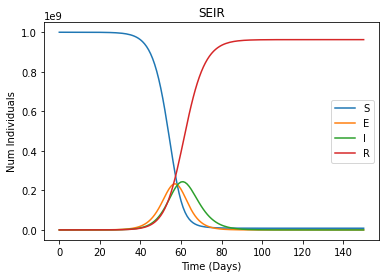

In [10]:
#plt.plot(N, label = 'N')
plt.plot(S_30, label = 'S')
plt.plot(E_30, label = 'E')
plt.plot(I_30, label = 'I')
plt.plot(R_30, label = 'R')
plt.title("SEIR")
plt.xlabel("Time (Days)")
plt.ylabel("Num Individuals")
plt.legend()
#plt.savefig("./Figures/SEIR.png", dpi = 600)


In [11]:
N0 = 1000000000.0
I0 = 3.0
E0 = 6000 
R0 = 0
S0 = N0 - I0 - E0 - R0
D0 = 0
V0 = 0

initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params = [mu,alpha,beta,gamma,0.25]
N_30,S_30,E_30,I_30,R_30,D_30 = run_seir(initials,params,150,1)

N0 = 1000000000.0
I0 = 3.0
E0 = 6000 
R0 = 0
S0 = N0 - I0 - E0 - R0
D0 = 0
V0 = 0


initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params = [mu,alpha,beta,gamma,0.125]
N_60,S_60,E_60,I_60,R_60,D_60 = run_seir(initials,params,150,1)



Text(0, 0.5, 'Num Individuals')

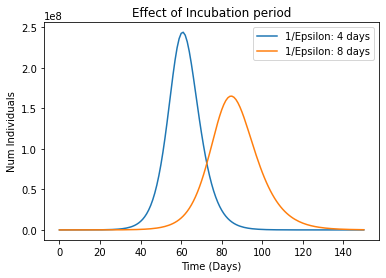

In [12]:
plt.plot(I_30, label ='1/Epsilon: 4 days')
plt.plot(I_60, label ='1/Epsilon: 8 days')
plt.legend()
plt.title("Effect of Incubation period")
plt.xlabel("Time (Days)")
plt.ylabel("Num Individuals")
#plt.savefig("./Figures/incubation_period.png", dpi = 600)

In [13]:
def get_ro(params):
    mu,alpha,beta,gamma,epsilon = params
    ro = (beta*epsilon)/((epsilon+mu)*(gamma+alpha+mu))
    return ro

In [14]:
def get_beta(params,ro):
    mu,alpha,beta,gamma,epsilon = params
    beta = (gamma+alpha) * ro
    return beta


In [15]:
get_beta(params,1)

0.20600000000000002

In [16]:
initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params2 = [mu,alpha,get_beta(params,0.25),gamma,epsilon]
N_1,S_1,E_1,I_1,R_1,D_1 = run_seir(initials,params2,100,1)

initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params2 = [mu,alpha,get_beta(params,0.5),gamma,epsilon]
N_2,S_2,E_2,I_2,R_2,D_2 = run_seir(initials,params2,100,1)

initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params2 = [mu,alpha,get_beta(params,1),gamma,epsilon]
N_3,S_3,E_3,I_3,R_3,D_3 = run_seir(initials,params2,100,1)

Text(0, 0.5, 'Num Individuals')

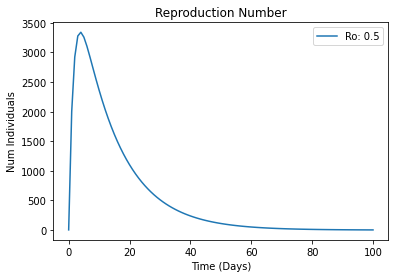

In [17]:
#plt.plot(I_1, label ='Ro: 0.25')
plt.plot(I_2, label ='Ro: 0.5')
#plt.plot(I_3, label ='Ro: 1')
plt.legend()
plt.title("Reproduction Number")
plt.xlabel("Time (Days)")
plt.ylabel("Num Individuals")
#plt.savefig("./Figures/Repro_1.png", dpi = 600)

In [18]:
initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params2 = [mu,alpha,get_beta(params,2),gamma,epsilon]
N_1,S_1,E_1,I_1,R_1,D_1 = run_seir(initials,params2,100,1)

initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params2 = [mu,alpha,get_beta(params,4),gamma,epsilon]
N_2,S_2,E_2,I_2,R_2,D_2 = run_seir(initials,params2,100,1)

initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params2 = [mu,alpha,get_beta(params,5),gamma,epsilon]
N_3,S_3,E_3,I_3,R_3,D_3 = run_seir(initials,params2,100,1)

Text(0, 0.5, 'Num Individuals ')

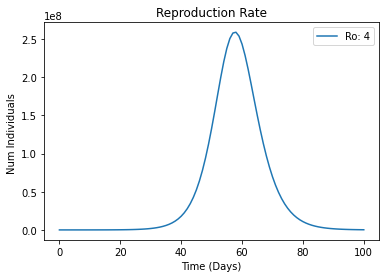

In [19]:
#plt.plot(I_1, label ='Ro: 2')
plt.plot(I_2, label ='Ro: 4')
# plt.plot(I_3, label ='Ro: 5')
plt.legend()
plt.title("Reproduction Rate")
plt.xlabel("Time (Days)")
plt.ylabel("Num Individuals ")
#plt.savefig("./Figures/Repro_2.png", dpi = 600)

In [20]:
#Changing number of initial exposed
N0 = 1000000000.0
I0 = 3.0
E01 = 10000
E02 = 100000
R0 = 0
S01 = N0 - I0 - E01 - R0
S02 = N0 - I0 - E02 - R0
D0 = 0



initials = [[N0],[S01],[E01],[I0],[R0],[D0]]
params2 = [mu,alpha,beta,gamma,1/3]
N_e1,S_e1,E_e1,I_e1,R_e1,D_e1 = run_seir(initials,params2,100,1)

initials = [[N0],[S02],[E02],[I0],[R0],[D0]]
params2 = [mu,alpha,beta,gamma,1/3]
N_e2,S_e2,E_e2,I_e2,R_e2,D_e2 = run_seir(initials,params2,100,1)

Text(0, 0.5, 'Num Individuals')

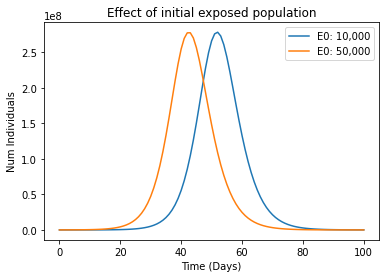

In [21]:
#plt.plot(I_1, label ='Ro: 0.25')
plt.plot(I_e1, label ='E0: 10,000')
plt.plot(I_e2, label ='E0: 50,000')
plt.legend()
plt.title("Effect of initial exposed population")
plt.xlabel("Time (Days)")
plt.ylabel("Num Individuals")
#plt.savefig("./Figures/E0.png", dpi = 600)

In [22]:
get_beta([0,0.006, 0.9,1/5,1/3],3)

0.6180000000000001

In [23]:
get_beta([0,0.006, 0.9,1/12,1/3],3)

0.268

In [24]:
#Changing number of initial exposed
N0 = 1000000000.0
I0 = 3.0
E0 = 6000 
R0 = 0
S0 = N0 - I0 - E0 - R0
D0 = 0
V0 = 0

alpha = 0.006
beta = 0.9
gamma = 1/5
epsilon = 1/3

#Changing incubation period gamma
initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params2 = [mu,alpha,0.6180000000000001,1/5,epsilon]
N_g1,S_g1,E_g1,I_g1,R_g1,D_g1 = run_seir(initials,params2,200,1)

initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params2 = [mu,alpha,0.268,1/12,epsilon]
N_g2,S_g2,E_g2,I_g2,R_g2,D_g2 = run_seir(initials,params2,200,1)

Text(0, 0.5, 'Num Individuals')

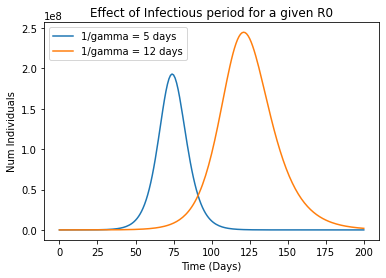

In [25]:
plt.plot(I_g1, label ='1/gamma = 5 days')
plt.plot(I_g2, label ='1/gamma = 12 days')
plt.legend()
plt.title("Effect of Infectious period for a given R0")
plt.xlabel("Time (Days)")
plt.ylabel("Num Individuals")
#plt.savefig("./Figures/gamma_rate.png", dpi = 600)

## MODEL2 SEIRV

In [26]:
# mu = 0.00
# alpha = 0.006
# beta = 0.75
# gamma = 1/8
# epsilon = 1/3
# v = 0.0025

def get_update_seirv(vals,params,dt):
    N,S,E,I,R,D,V = vals
    mu,alpha,beta,gamma,epsilon, v= params
    br = mu*N

    Vnew = V + dt * (v*S - mu*V)
    Snew = S + dt * (br - (mu*S) - (beta*S*I/N) - (v*S))
    Enew = E + dt * ((beta*S*I/N) - (mu + epsilon)*E)
    Inew = I + dt * (epsilon*E - (gamma + mu + alpha)*I)
    Rnew = R + dt * (gamma*I - mu*R)
    Dnew = D + dt * (mu*(S+I+E+R+V) + alpha*I)

    return (Snew,Enew,Inew,Rnew,Dnew,Vnew)

def run_seirv(initial, params,T,dt):
    N,S,E,I,R,D,V = initial
    num_steps = T/dt

    for i in range(int(num_steps)):
        temp = (N[-1],S[-1],E[-1],I[-1],R[-1],D[-1],V[-1])
        Snew,Enew,Inew,Rnew,Dnew,Vnew = get_update_seirv(temp,params,dt)
        Nnew = Snew+Enew+Inew+Rnew+Vnew
        N.append(Nnew)
        S.append(Snew)
        E.append(Enew)
        I.append(Inew)
        R.append(Rnew)
        D.append(Dnew)
        V.append(Vnew)
    return N,S,E,I,R,D,V


In [27]:
#Changing number of initial exposed
N0 = 1000000000.0
I0 = 3.0
E0 = 6000 
V0 = 0.2 * N0
R0 = 0
S0 = N0 - I0 - E0 - R0 - V0
D0 = 0


alpha = 0.006
beta = 0.9
gamma = 1/5
epsilon = 1/3
v = 0.0025

initials = [[N0],[S0],[E0],[I0],[R0],[D0],[V0]]
params = [mu,alpha,beta,gamma,epsilon, v]
N_30_v,S_30_v,E_30_v,I_30_v,R_30_v,D_30_v, V_30_v= run_seirv(initials,params,100,1)

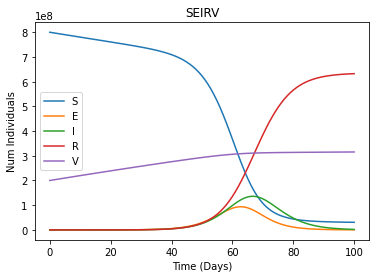

In [28]:
#plt.plot(N, label = 'N')
plt.plot(S_30_v, label = 'S')
plt.plot(E_30_v, label = 'E')
plt.plot(I_30_v, label = 'I')
plt.plot(R_30_v, label = 'R')
plt.plot(V_30_v, label = 'V')
plt.title("SEIRV")
plt.xlabel("Time (Days)")
plt.ylabel("Num Individuals")
plt.legend()
#plt.savefig("./Figures/SEIR_V.png", dpi = 600)

In [29]:
N0 = 1000000000.0
I0 = 3.0
E0 = 6000 
R0 = 0
S0 = N0 - I0 - E0 - R0
D0 = 0
V0 = 0
T = 100
dt = 1
mu = 0
alpha = 0.006
beta = 0.9
gamma = 1/5
epsilon = 1/3

initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params = [mu,alpha,beta,gamma,epsilon]
N_30,S_30,E_30,I_30,R_30,D_30 = run_seir(initials,params,100,1)

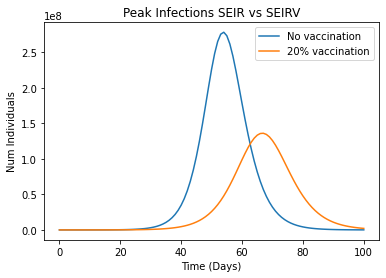

In [30]:
plt.plot(I_30,label = "No vaccination")
plt.plot(I_30_v ,label = '20% vaccination')
plt.xlabel("Time (Days)")
plt.ylabel("Num Individuals")
plt.title('Peak Infections SEIR vs SEIRV')
plt.legend()
#plt.savefig("./Figures/SERIV_peak_infection.png", dpi = 600)

In [31]:
N0 = 1000000000.0
I0 = 3.0
E0 = 6000 
R0 = 0
S0 = N0 - I0 - E0 - R0
D0 = 0
V0 = 0

initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params = [mu,alpha,beta,gamma,0.25]
N_30,S_30,E_30,I_30,R_30,D_30 = run_seir(initials,params,150,1)



In [32]:
N0 = 1000000000.0
I0 = 3.0
E0 = 6000 
R0 = 0
S0 = N0 - I0 - E0 - R0
D0 = 0
V0 = 0


initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params = [mu,alpha,beta,gamma,0.125]
N_60,S_60,E_60,I_60,R_60,D_60 = run_seir(initials,params,150,1)

In [33]:
N0 = 1000000000.0
I0 = 3.0
E0 = 6000 
V0 = 0.2 * N0
R0 = 0
S0 = N0 - I0 - E0 - R0 - V0
D0 = 0


alpha = 0.006
beta = 0.9
gamma = 1/5
epsilon = 1/3
v = 0.0025

initials = [[N0],[S0],[E0],[I0],[R0],[D0],[V0]]
params = [mu,alpha,beta,gamma,0.25, v]
N_30_v,S_30_v,E_30_v,I_30_v,R_30_v,D_30_v, V_30_v= run_seirv(initials,params,150,1)



In [34]:
N0 = 1000000000.0
I0 = 3.0
E0 = 6000 
V0 = 0.2 * N0
R0 = 0
S0 = N0 - I0 - E0 - R0 - V0
D0 = 0

initials = [[N0],[S0],[E0],[I0],[R0],[D0],[V0]]
params = [mu,alpha,beta,gamma,0.125, v]
N_60_v,S_60_v,E_60_v,I_60_v,R_60_v,D_60_v, V_60_v= run_seirv(initials,params,150,1)

Text(0, 0.5, 'Num Individuals')

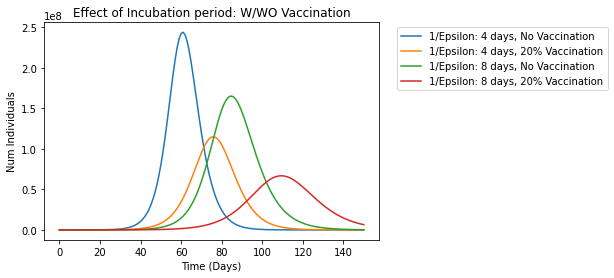

In [35]:
plt.plot(I_30, label ='1/Epsilon: 4 days, No Vaccination')
plt.plot(I_30_v, label ='1/Epsilon: 4 days, 20% Vaccination')
plt.plot(I_60, label ='1/Epsilon: 8 days, No Vaccination')
plt.plot(I_60_v, label ='1/Epsilon: 8 days, 20% Vaccination')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Effect of Incubation period: W/WO Vaccination")
plt.xlabel("Time (Days)")
plt.ylabel("Num Individuals")
#plt.savefig("./Figures/incubation_rate_vaccination.png", dpi = 600)

In [36]:
#Changing number of initial exposed
N0 = 1000000000.0
I0 = 3.0
E0 = 6000 
R0 = 0
S0 = N0 - I0 - E0 - R0
D0 = 0
V0 = 0

alpha = 0.006
beta = 0.9
gamma = 1/5
epsilon = 1/3

#Changing incubation period gamma
initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params2 = [mu,alpha,0.6180000000000001,1/5,epsilon]
N_g1,S_g1,E_g1,I_g1,R_g1,D_g1 = run_seir(initials,params2,300,1)

initials = [[N0],[S0],[E0],[I0],[R0],[D0]]
params2 = [mu,alpha,0.268,1/12,epsilon]
N_g2,S_g2,E_g2,I_g2,R_g2,D_g2 = run_seir(initials,params2,300,1)

In [37]:
N0 = 1000000000.0
I0 = 3.0
E0 = 6000 
V0 = 0.2 * N0
R0 = 0
S0 = N0 - I0 - E0 - R0 - V0
D0 = 0


alpha = 0.006
beta = 0.9
gamma = 1/5
epsilon = 1/3
v = 0.0025

initials = [[N0],[S0],[E0],[I0],[R0],[D0],[V0]]
params = [mu,alpha,0.6180000000000001,1/5,epsilon,v]
N_g1_v, S_g1_v, E_g1_v, I_g1_v, R_g1_v, D_g1_v, V_g1_v = run_seirv(initials,params,300,1)

initials = [[N0],[S0],[E0],[I0],[R0],[D0],[V0]]
params = [mu,alpha,0.268,1/12,epsilon,v]
N_g2_v, S_g2_v, E_g2_v, I_g2_v, R_g2_v, D_g2_v, V_g2_v = run_seirv(initials,params,300,1)

Text(0, 0.5, 'Num Individuals')

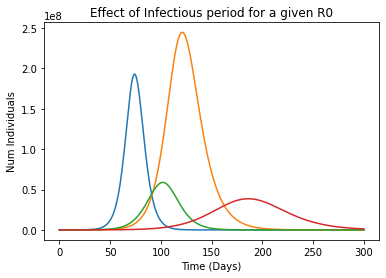

In [38]:
plt.plot(I_g1, label ='1/gamma = 5 days, No Vaccination')
plt.plot(I_g2, label ='1/gamma = 12 days, No Vaccination')
plt.plot(I_g1_v, label ='1/gamma = 5 days, 20% Vaccination')
plt.plot(I_g2_v, label ='1/gamma = 12 days, 20% Vaccination')
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Effect of Infectious period for a given R0")
plt.xlabel("Time (Days)")
plt.ylabel("Num Individuals")
#plt.savefig("./Figures/Gamma_rate_Vaccination.png", dpi = 600)

In [39]:
#Changing number of initial exposed
N0 = 1000000000.0
I0 = 3.0
E01 = 10000
E02 = 100000
R0 = 0
S01 = N0 - I0 - E01 - R0
S02 = N0 - I0 - E02 - R0
D0 = 0



initials = [[N0],[S01],[E01],[I0],[R0],[D0]]
params2 = [mu,alpha,beta,gamma,1/3]
N_e1,S_e1,E_e1,I_e1,R_e1,D_e1 = run_seir(initials,params2,100,1)

initials = [[N0],[S02],[E02],[I0],[R0],[D0]]
params2 = [mu,alpha,beta,gamma,1/3]
N_e2,S_e2,E_e2,I_e2,R_e2,D_e2 = run_seir(initials,params2,100,1)

In [40]:
N0 = 1000000000.0
I0 = 3.0
E01 = 10000
E02 = 100000  
V0 = 0.2 * N0
R0 = 0
S01 = N0 - I0 - E01 - R0 - V0
S02 = N0 - I0 - E02 - R0 - V0
D0 = 0


alpha = 0.006
beta = 0.9
gamma = 1/5
epsilon = 1/3
v = 0.0025

initials = [[N0],[S01],[E01],[I0],[R0],[D0],[V0]]
params = [mu,alpha,beta,gamma,1/3,v]
N_g1_v, S_g1_v, E_g1_v, I_g1_v, R_g1_v, D_g1_v, V_g1_v = run_seirv(initials,params,100,1)

initials = [[N0],[S01],[E02],[I0],[R0],[D0],[V0]]
params = [mu,alpha,beta,gamma,1/3,v]
N_g2_v, S_g2_v, E_g2_v, I_g2_v, R_g2_v, D_g2_v, V_g2_v = run_seirv(initials,params,100,1)

Text(0, 0.5, 'Num Individuals')

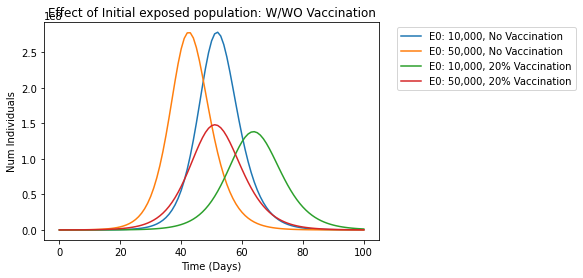

In [41]:
#plt.plot(I_1, label ='Ro: 0.25')
plt.plot(I_e1, label ='E0: 10,000, No Vaccination')
plt.plot(I_e2, label ='E0: 50,000, No Vaccination')
plt.plot(I_g1_v, label ='E0: 10,000, 20% Vaccination')
plt.plot(I_g2_v, label ='E0: 50,000, 20% Vaccination')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Effect of Initial exposed population: W/WO Vaccination")
plt.xlabel("Time (Days)")
plt.ylabel("Num Individuals")
#plt.savefig("./Figures/Initial_exposed.png", dpi = 600)